Q2:
Implement the Principal Component Analysis algorithm for reducing the dimensionality of the points given in the datasets: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris. data. Each point of this dataset is a 4-dimensional vector (d = 4) given in the first column of the datafile. Reduce the dimensionality to 2 (k = 2). This dataset contains 3 clusters. Ground-truth cluster IDs are given as the fifth column of the data file. In order to evaluate the performance of the PCA algorithm, perform clustering (in 3 clusters) before and after dimensionality reduction using the Spectral Clustering algorithm and then find the percentage of points for which the estimated cluster label is correct. Report the accuracy of the Spectral Clustering algorithm before and after the dimensionality reduction. Report the reconstruction error for k = 1, 2, 3.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
class PCA_Test:
    def __init__(self, component_size=2):
        self.component_size = component_size
        self.components = None
        self.x, self.y = self.read_input()
        self.mean = np.mean(self.x, axis=0)
        self.diff = self.x - self.mean
        
        
    def fit(self):
        eigen_values, eigen_vectors = np.linalg.eig(np.cov((self.diff).T))
        sorted_eign_values = np.flip(np.argsort(eigen_values))
        eigen_values = eigen_values[sorted_eign_values]
        eigen_vectors = eigen_vectors.T[sorted_eign_values]
        self.components = eigen_vectors[0:self.component_size]
    
    def transform(self):
        return np.dot(self.diff, self.components.T)
    
    def plot_data(self):
        transformed = self.transform()
        plt.scatter(transformed[:, 0], 
                    transformed[:, 1],
                    c=self.y,
                    alpha=0.8,
                    cmap=plt.cm.get_cmap('plasma', 
                    3))
        plt.xlabel('PC X')
        plt.ylabel('PC Y')
        plt.colorbar()
        plt.show()
    
    # Reading input provided in the file
    def read_input(self): 
        df = pd.read_csv('iris.data',sep = ',',header=None)
        df = df.replace(to_replace="Iris-setosa", value=0)
        df = df.replace(to_replace="Iris-versicolor", value=1)
        df = df.replace(to_replace="Iris-virginica", value=2)
        col1 = df.iloc[:,0:4]
        col2 = df.iloc[:,4]
        return col1, col2

In [3]:
pca = PCA_Test()
pca.fit()
pca.transform()

array([[-2.68420713, -0.32660731],
       [-2.71539062,  0.16955685],
       [-2.88981954,  0.13734561],
       [-2.7464372 ,  0.31112432],
       [-2.72859298, -0.33392456],
       [-2.27989736, -0.74778271],
       [-2.82089068,  0.08210451],
       [-2.62648199, -0.17040535],
       [-2.88795857,  0.57079803],
       [-2.67384469,  0.1066917 ],
       [-2.50652679, -0.65193501],
       [-2.61314272, -0.02152063],
       [-2.78743398,  0.22774019],
       [-3.22520045,  0.50327991],
       [-2.64354322, -1.1861949 ],
       [-2.38386932, -1.34475434],
       [-2.6225262 , -0.81808967],
       [-2.64832273, -0.31913667],
       [-2.19907796, -0.87924409],
       [-2.58734619, -0.52047364],
       [-2.3105317 , -0.39786782],
       [-2.54323491, -0.44003175],
       [-3.21585769, -0.14161557],
       [-2.30312854, -0.10552268],
       [-2.35617109,  0.03120959],
       [-2.50791723,  0.13905634],
       [-2.469056  , -0.13788731],
       [-2.56239095, -0.37468456],
       [-2.63982127,

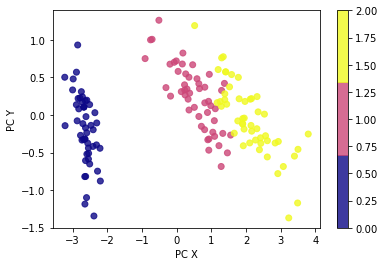

None


In [4]:
print(pca.plot_data())
